In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [55]:
def PDE_ffd(D,f0,fa,fb,M,N,a,b,T=1):
    h=(b-a)/M
    k=T/N
    sigma= D*k*np.power(h,-2.0)
    
    sVec=np.full(M-3,sigma)
    diag=np.full(M-2,1-2*sigma)
    A=np.diag(sVec, -1) + np.diag(diag, 0) + np.diag(sVec, 1)
    
    
    sol=np.empty([N,M-2])
    sol[0]= np.array([f0( a+h*(i+1) )for i in range(M-2)])
    
    for i in range(N-1):
        V=np.full(M-2,0)
        V[0]=sigma*fa(0+k*i)
        V[-1]=sigma*fb(0+k*i)
        sol[i+1]=np.dot(A,sol[i])+V
        
    np.insert(sol, 0, np.array([fa(i)for i in range(N)]), 1)
    np.insert(sol,-1, np.array([fb(i)for i in range(N)]), 1)
    return sol
    
    
    

In [118]:
f0=lambda x: 5*np.sin(np.sin(2*np.pi*x))
fa=lambda x: 0
fb=lambda x: 0

sol=PDE_ffd(1,f0,fa,fb,10,250,0,1)

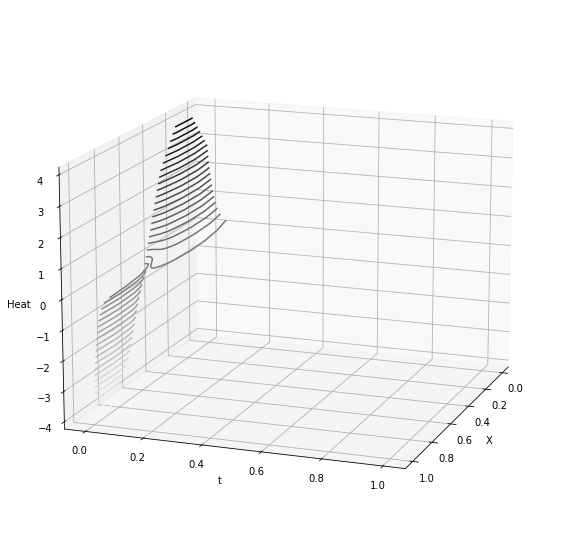

In [117]:
def z(x,y):
    return sol[int(y*249)][int(x*7)]


x=np.linspace(0,1,8)
y=np.linspace(0,1,250)
X, Y = np.meshgrid(x, y,indexing="xy")

#z=lambda x,y: sol[int(y*249)][int(x*9)]

#Z=z(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, sol, 50, cmap='binary')
ax.set_xlabel('X')
ax.set_ylabel('t')
ax.set_zlabel('Heat')
ax.view_init(15,20)

